<a href="https://colab.research.google.com/github/sharansumbad/Churn_Prediction/blob/main/RobinHood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()


Saving equity_value_data.csv to equity_value_data.csv


In [3]:
equity = pd.read_csv('equity_value_data.csv')

In [4]:
from google.colab import files
uploaded = files.upload()


Saving features_data.csv to features_data.csv


In [5]:
features = pd.read_csv('features_data.csv')

In [94]:
features.head()


,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91


In [9]:
equity.size


3357474

In [14]:
## code to attact the churn data drom the equity data set

features_data = pd.read_csv('features_data.csv')
equity_value_data = pd.read_csv('equity_value_data.csv')

chunked_user_list = []
current_user = equity_value_data['user_id'][0]
count = 0
for index in range(len(equity_value_data['user_id'])-1):
      if equity_value_data['user_id'][index] != current_user:
          if count >= 28:
              chunked_user_list.append(current_user)
          count = 0
          current_user = equity_value_data['user_id'][index]
      else:
        if equity_value_data['close_equity'][index] < 100:
            count += 1
        else:
            if count >= 28:
              chunked_user_list.append(current_user)
            count = 0

chunked_header_list = []

for i in range(len(features_data['user_id'])):

      if features_data['user_id'][i] in chunked_user_list:
          chunked_header_list.append(1)
      else:
          chunked_header_list.append(0)
print(chunked_header_list)

[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 

In [63]:
features_data['chruned'] = chunked_header_list
features_data.to_csv(r'features_data_with_chunked.csv')

In [64]:
churned_df = pd.read_csv("features_data_with_chunked.csv")

In [65]:
churned_df.chunked.value_counts()

0    4032
1    1552
Name: chunked, dtype: int64

In [66]:
len(churned_df)

5584

In [68]:
churned_df.head()

,Unnamed: 0,Unnamed: 0.1,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,chunked,chruned
0,0,0,1,limited_investment_exp,2,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,1,1
1,1,1,0,limited_investment_exp,2,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0,0
2,2,2,0,limited_investment_exp,2,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,1,1
3,3,3,0,limited_investment_exp,2,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0,0
4,4,4,1,limited_investment_exp,2,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,1,1


In [67]:
churned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5584 non-null   int64  
 1   Unnamed: 0.1                  5584 non-null   int64  
 2   risk_tolerance                5584 non-null   int64  
 3   investment_experience         5584 non-null   object 
 4   liquidity_needs               5584 non-null   object 
 5   platform                      5584 non-null   object 
 6   time_spent                    5584 non-null   float64
 7   instrument_type_first_traded  5584 non-null   object 
 8   first_deposit_amount          5584 non-null   float64
 9   time_horizon                  5584 non-null   object 
 10  user_id                       5584 non-null   object 
 11  chunked                       5584 non-null   int64  
 12  chruned                       5584 non-null   int64  
dtypes: 

In [72]:
churned_df = churned_df.drop(churned_df.columns[[0, 1, 3, 10 ,11]], axis=1)

In [73]:
churned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   int64  
 1   liquidity_needs               5584 non-null   object 
 2   platform                      5584 non-null   object 
 3   time_spent                    5584 non-null   float64
 4   instrument_type_first_traded  5584 non-null   object 
 5   first_deposit_amount          5584 non-null   float64
 6   time_horizon                  5584 non-null   object 
 7   chruned                       5584 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 349.1+ KB


In [78]:
churned_df = pd.get_dummies(churned_df)

In [79]:
churned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   risk_tolerance                               5584 non-null   int64  
 1   time_spent                                   5584 non-null   float64
 2   first_deposit_amount                         5584 non-null   float64
 3   chruned                                      5584 non-null   int64  
 4   liquidity_needs_1                            5584 non-null   uint8  
 5   liquidity_needs_2                            5584 non-null   uint8  
 6   liquidity_needs_not_important_liq_need       5584 non-null   uint8  
 7   liquidity_needs_somewhat_important_liq_need  5584 non-null   uint8  
 8   liquidity_needs_very_important_liq_need      5584 non-null   uint8  
 9   platform_Android                             5584 non-null   uint8  
 10  

In [80]:
X = churned_df.drop(['chruned'],axis=1)
y = churned_df.chruned

In [81]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

#building the model & printing the score

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)


print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.80
Accuracy of XGB classifier on test set: 0.76


In [82]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


# can be improved usuinh hyper paramater tuning

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       204
           1       0.55      0.54      0.55        76

    accuracy                           0.76       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.76      0.76      0.76       280



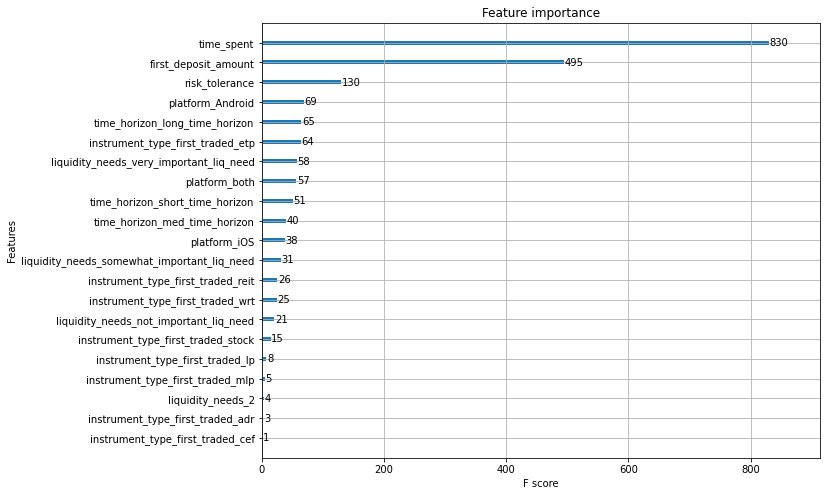

In [83]:
#important features visulization.

from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)


In [85]:
churned_df['proba'] = xgb_model.predict_proba(churned_df[X_train.columns])[:,1]


In [95]:
churned_df['user_id'] = features["user_id"]


In [97]:
# user churn probabablity based on the modal
churned_df[["user_id","proba"]].head(10)

,user_id,proba
0,895044c23edc821881e87da749c01034,0.605698
1,458b1d95441ced242949deefe8e4b638,0.153517
2,c7936f653d293479e034865db9bb932f,0.672376
3,b255d4bd6c9ba194d3a350b3e76c6393,0.399456
4,4a168225e89375b8de605cbc0977ae91,0.697997
5,0322b1d744cc89ebbe6ebe70d824d922,0.345648
6,f4cac8c1544b723ddedc9bdba81c64c0,0.642944
7,bdc39d2fc664ef9a5e6713168057f892,0.311723
8,85f2f0f54411b4f3e7a403ba902e7280,0.040280
9,529ddd19dac72d55cde8e633340a9aed,0.728769


In [98]:
roc_auc_score(y_test, y_pred)

0.6888544891640868

In [112]:
corr_matrix = churned_df.corr()
print(corr_matrix["chruned"].sort_values(ascending=False))

chruned                                        1.000000
proba                                          0.566706
instrument_type_first_traded_stock             0.062356
time_horizon_short_time_horizon                0.050858
instrument_type_first_traded_wrt               0.049008
liquidity_needs_2                              0.028459
platform_iOS                                   0.023529
liquidity_needs_somewhat_important_liq_need    0.022814
instrument_type_first_traded_tracking          0.021572
instrument_type_first_traded_mlp               0.010984
instrument_type_first_traded_lp                0.008207
instrument_type_first_traded_rlt               0.004968
time_horizon_med_time_horizon                  0.003078
instrument_type_first_traded_cef               0.002953
platform_Android                               0.001824
instrument_type_first_traded_0                -0.005086
liquidity_needs_1                             -0.008303
instrument_type_first_traded_reit             -0

(array([ 757.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4827.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

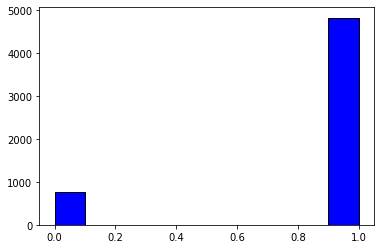

In [114]:
plt.hist(churned_df['instrument_type_first_traded_stock'], color = 'blue', edgecolor = 'black')